<a href="https://colab.research.google.com/github/surajn581/covid19_detection/blob/master/VGG_Model_Training.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import keras
from tensorflow.python.keras.utils import data_utils
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.optimizers import RMSprop

In [3]:
WEIGHTS_PATH = ('https://storage.googleapis.com/tensorflow/keras-applications/'
                'vgg16/vgg16_weights_tf_dim_ordering_tf_kernels.h5')
WEIGHTS_PATH_NO_TOP = ('https://storage.googleapis.com/tensorflow/'
                       'keras-applications/vgg16/'
                       'vgg16_weights_tf_dim_ordering_tf_kernels_notop.h5')

def vgg16(image_height, image_width, channels, NUM_CLASSES, include_top=True, weights='imagenet', pooling=None):
    model = tf.keras.Sequential()
    # 1
    model.add(tf.keras.layers.Conv2D(filters=64,
                                     kernel_size=(3, 3),
                                     strides=1,
                                     padding='same',
                                     activation=tf.keras.activations.relu,
                                     name='block1_conv1',
                                     input_shape=(image_height, image_width, channels)))
    model.add(tf.keras.layers.Conv2D(filters=64,
                                     kernel_size=(3, 3),
                                     strides=1,
                                     padding='same',
                                     name='block1_conv2',
                                     activation=tf.keras.activations.relu))
    model.add(tf.keras.layers.MaxPool2D(pool_size=(2, 2),
                                        strides=2,
                                        name='block1_pool',
                                        padding='same'))

    # 2
    model.add(tf.keras.layers.Conv2D(filters=128,
                                     kernel_size=(3, 3),
                                     strides=1,
                                     padding='same',
                                     name='block2_conv1',
                                     activation=tf.keras.activations.relu))
    model.add(tf.keras.layers.Conv2D(filters=128,
                                     kernel_size=(3, 3),
                                     strides=1,
                                     padding='same',
                                     name='block2_conv2',
                                     activation=tf.keras.activations.relu))
    model.add(tf.keras.layers.MaxPool2D(pool_size=(2, 2),
                                        strides=2,
                                        name='block2_pool',
                                        padding='same'))

    # 3
    model.add(tf.keras.layers.Conv2D(filters=256,
                                     kernel_size=(3, 3),
                                     strides=1,
                                     padding='same',
                                     name='block3_conv1',
                                     activation=tf.keras.activations.relu))
    model.add(tf.keras.layers.Conv2D(filters=256,
                                     kernel_size=(3, 3),
                                     strides=1,
                                     padding='same',
                                     name='block3_conv2',
                                     activation=tf.keras.activations.relu))
    model.add(tf.keras.layers.Conv2D(filters=256,
                                     kernel_size=(3, 3),
                                     strides=1,
                                     padding='same',
                                     name='block3_conv3',
                                     activation=tf.keras.activations.relu))
    model.add(tf.keras.layers.MaxPool2D(pool_size=(2, 2),
                                        strides=2,
                                        name='block3_pool',
                                        padding='same'))

    # 4
    model.add(tf.keras.layers.Conv2D(filters=512,
                                     kernel_size=(3, 3),
                                     strides=1,
                                     padding='same',
                                     name='block4_conv1',
                                     activation=tf.keras.activations.relu))
    model.add(tf.keras.layers.Conv2D(filters=512,
                                     kernel_size=(3, 3),
                                     strides=1,
                                     padding='same',
                                     name='block4_conv2',
                                     activation=tf.keras.activations.relu))
    model.add(tf.keras.layers.Conv2D(filters=512,
                                     kernel_size=(3, 3),
                                     strides=1,
                                     padding='same',
                                     name='block4_conv3',
                                     activation=tf.keras.activations.relu))
    model.add(tf.keras.layers.MaxPool2D(pool_size=(2, 2),
                                        strides=2,
                                        name='block4_pool',
                                        padding='same'))

    # 5
    model.add(tf.keras.layers.Conv2D(filters=512,
                                     kernel_size=(3, 3),
                                     strides=1,
                                     padding='same',
                                     name='block5_conv1',
                                     activation=tf.keras.activations.relu))
    model.add(tf.keras.layers.Conv2D(filters=512,
                                     kernel_size=(3, 3),
                                     strides=1,
                                     padding='same',
                                     name='block5_conv2',
                                     activation=tf.keras.activations.relu))
    model.add(tf.keras.layers.Conv2D(filters=512,
                                     kernel_size=(3, 3),
                                     strides=1,
                                     padding='same',
                                     name='block5_conv3',
                                     activation=tf.keras.activations.relu))
    model.add(tf.keras.layers.MaxPool2D(pool_size=(2, 2),
                                        strides=2,
                                        name='block5_pool',
                                        padding='same'))

    if include_top:
        # Classification block
        model.add(tf.keras.layers.Flatten())
        model.add(tf.keras.layers.Dense(units=4096,
                                        activation=tf.keras.activations.relu))
        model.add(tf.keras.layers.Dense(units=4096,
                                        activation=tf.keras.activations.relu))
        model.add(tf.keras.layers.Dropout(rate=0.5))

        model.add(tf.keras.layers.Dense(units=NUM_CLASSES,
                                    activation=tf.keras.activations.softmax))
    else:
        if pooling == 'avg':
            model.add(tf.keras.layers.GlobalAveragePooling2D())
        elif pooling == 'max':
            model.add(tf.keras.layers.GlobalMaxPooling2D())

    if weights == 'imagenet':
        if include_top:
            weights_path = data_utils.get_file(
            'vgg16_weights_tf_dim_ordering_tf_kernels.h5',
            WEIGHTS_PATH,
            cache_subdir='models',
            file_hash='64373286793e3c8b2b4e3219cbf3544b')
        else:
            weights_path = data_utils.get_file(
                'vgg16_weights_tf_dim_ordering_tf_kernels_notop.h5',
                WEIGHTS_PATH_NO_TOP,
                cache_subdir='models',
                file_hash='6d6bbae143d832006294945121d1f1fc')
        model.load_weights(weights_path)
    elif weights is not None:
        model.load_weights(weights)

    return model

In [4]:
train_path = "/content/drive/My Drive/Colab Notebooks/covid19_detection/train_data"
test_path = "/content/drive/My Drive/Colab Notebooks/covid19_detection/test_data"

train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        validation_split=0.2)
#validation_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        train_path,  
        target_size=(224, 224),  
        batch_size= 32,
        class_mode='categorical', subset="training")

validation_generator = train_datagen.flow_from_directory(
        train_path,
        target_size=(224, 224),
        batch_size=32,
        class_mode='categorical', subset="validation")







Found 120 images belonging to 3 classes.
Found 30 images belonging to 3 classes.


In [5]:
train_generator.class_indices

{'covid': 0, 'healthy': 1, 'noncovid': 2}

In [6]:

baseModel = vgg16(224, 224, 3, 3, include_top=False)
headModel = baseModel.output
headModel = tf.keras.layers.AveragePooling2D(pool_size=(4, 4))(headModel)
headModel = tf.keras.layers.Flatten(name='flatten')(headModel)
headModel = tf.keras.layers.Dense(4096, activation='relu', name='fc1')(headModel)
headModel = tf.keras.layers.Dense(4096, activation='relu', name='fc2')(headModel)
headModel = tf.keras.layers.Dropout(0.5)(headModel)
headModel = tf.keras.layers.Dense(3, activation='softmax')(headModel)
# place the head FC model on top of the base model (this will become
# the actual model we will train)
model = Model(inputs=baseModel.input, outputs=headModel)
# loop over all layers in the base model and freeze them so they will
# *not* be updated during the first training process
for layer in baseModel.layers:
    layer.trainable = False

model.summary()
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

hist = model.fit_generator(
  train_generator,
  validation_data=validation_generator,
  epochs=10
)

58892288/58889256 [==============================] - 0s 0us/step
Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
block1_conv1_input (InputLay [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_______________________________________________________

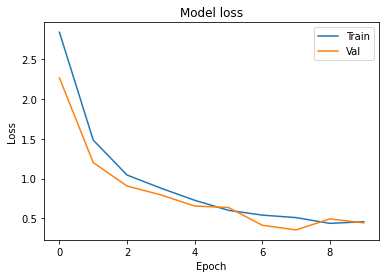

In [7]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

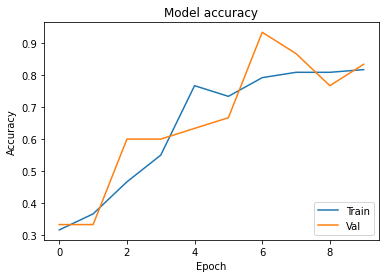

In [8]:
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()

In [10]:
# Confusion Matrix 

# Since we do not have a lot of data, we did not split into training-validation-testing.
# Instead we split into training-validation.
# we shall use images in validation dataset for testing. 

# There is one problem. Previously, we set shuffle = True in our generator.
# This makes it difficult to obtain predictions and their corresponding ground truth labels.
# Thus, we shall call the generator again, but this time set shuffle = False.
train_path = "/content/drive/My Drive/Colab Notebooks/covid19_detection/train_data"
test_path = "/content/drive/My Drive/Colab Notebooks/covid19_detection/test_data"

img_height, img_width=224,224
val_generator = train_datagen.flow_from_directory(
    directory = train_path,
    classes = ['covid','healthy','nocovid'],
    target_size=(img_height, img_width),
    seed = 42,
    batch_size = 32, 
    shuffle = False,
    subset = 'validation'
)

# Obtain predictions
pred = model.predict_generator(val_generator) # Gives class probabilities
pred = np.round(pred) # Gives one-hot encoded classes
pred = np.argmax(pred, axis = 1) # Gives class labels

# Obtain actual labels
actual = val_generator.classes
    
# Now plot matrix
cm = confusion_matrix(actual, pred, labels = [0, 1, 2])

Found 20 images belonging to 3 classes.


In [41]:
def make_confusion_matrix(cf,
                          group_names=None,
                          categories='auto',
                          count=True,
                          percent=True,
                          cbar=True,
                          xyticks=True,
                          xyplotlabels=True,
                          sum_stats=True,
                          figsize=None,
                          cmap='Blues',
                          title=None):


    # CODE TO GENERATE TEXT INSIDE EACH SQUARE
    blanks = ['' for i in range(cf.size)]

    if group_names and len(group_names)==cf.size:
        group_labels = ["{}\n".format(value) for value in group_names]
    else:
        group_labels = blanks

    if count:
        group_counts = ["{0:0.0f}\n".format(value) for value in cf.flatten()]
    else:
        group_counts = blanks

    if percent:
        group_percentages = ["{0:.2%}".format(value) for value in cf.flatten()/np.sum(cf)]
    else:
        group_percentages = blanks

    box_labels = [f"{v1}{v2}{v3}".strip() for v1, v2, v3 in zip(group_labels,group_counts,group_percentages)]
    box_labels = np.asarray(box_labels).reshape(cf.shape[0],cf.shape[1])


    # CODE TO GENERATE SUMMARY STATISTICS & TEXT FOR SUMMARY STATS
    if sum_stats:
        #Accuracy is sum of diagonal divided by total observations
        accuracy  = np.trace(cf) / float(np.sum(cf))

        #if it is a binary confusion matrix, show some more stats
        if len(cf)==2:
            #Metrics for Binary Confusion Matrices
            precision = cf[1,1] / sum(cf[:,1])
            recall    = cf[1,1] / sum(cf[1,:])
            f1_score  = 2*precision*recall / (precision + recall)
            stats_text = "\n\nAccuracy={:0.3f}\nPrecision={:0.3f}\nRecall={:0.3f}\nF1 Score={:0.3f}".format(
                accuracy,precision,recall,f1_score)
        else:
            # stats_text = "\n\nAccuracy={:0.3f}".format(accuracy)
            stats_text = ""
    else:
        stats_text = ""


    # SET FIGURE PARAMETERS ACCORDING TO OTHER ARGUMENTS
    if figsize==None:
        #Get default figure size if not set
        figsize = plt.rcParams.get('figure.figsize')

    if xyticks==False:
        #Do not show categories if xyticks is False
        categories=False


    # MAKE THE HEATMAP VISUALIZATION
    plt.figure(figsize=figsize)
    sns.heatmap(cf,annot=box_labels,fmt="",cmap=cmap,cbar=cbar,xticklabels=categories,yticklabels=categories)

    if xyplotlabels:
        plt.ylabel('True label')
        plt.xlabel('Predicted label' + stats_text)
    else:
        plt.xlabel(stats_text)
    
    if title:
        plt.title(title)

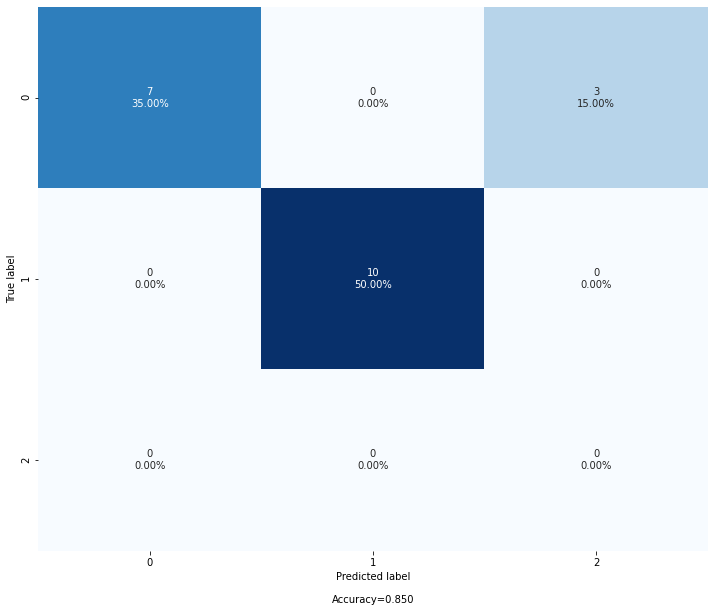

In [13]:
make_confusion_matrix(cm, figsize=(12,10), cbar=False)

In [14]:
# Classification Report
print(classification_report(actual, pred))

              precision    recall  f1-score   support

           0       1.00      0.70      0.82        10
           1       1.00      1.00      1.00        10
           2       0.00      0.00      0.00         0

    accuracy                           0.85        20
   macro avg       0.67      0.57      0.61        20
weighted avg       1.00      0.85      0.91        20



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [18]:
def train_model(batch_size = 32, LR = 0.0001, epochs = 5, opt = 'adam', verbose=0):

  WEIGHTS_PATH = ('https://storage.googleapis.com/tensorflow/keras-applications/'
                'vgg16/vgg16_weights_tf_dim_ordering_tf_kernels.h5')
  WEIGHTS_PATH_NO_TOP = ('https://storage.googleapis.com/tensorflow/'
                        'keras-applications/vgg16/'
                        'vgg16_weights_tf_dim_ordering_tf_kernels_notop.h5')
  
  train_path = "/content/drive/My Drive/Colab Notebooks/covid19_detection/train_data"

  img_height, img_width=224,224

  train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        validation_split=0.2)
  #validation_datagen = ImageDataGenerator(rescale=1./255)

  train_generator = train_datagen.flow_from_directory(
          train_path,  
          target_size=(224, 224),  
          batch_size= 32,
          class_mode='categorical', subset="training")

  validation_generator = train_datagen.flow_from_directory(
          train_path,
          target_size=(224, 224),
          batch_size=32,
          class_mode='categorical', subset="validation")


  baseModel = vgg16(224, 224, 3, 3, include_top=False)
  headModel = baseModel.output
  headModel = tf.keras.layers.AveragePooling2D(pool_size=(4, 4))(headModel)
  headModel = tf.keras.layers.Flatten(name='flatten')(headModel)
  headModel = tf.keras.layers.Dense(4096, activation='relu', name='fc1')(headModel)
  headModel = tf.keras.layers.Dense(4096, activation='relu', name='fc2')(headModel)
  headModel = tf.keras.layers.Dropout(0.5)(headModel)
  headModel = tf.keras.layers.Dense(3, activation='softmax')(headModel)
  # place the head FC model on top of the base model (this will become
  # the actual model we will train)
  model = Model(inputs=baseModel.input, outputs=headModel)
  # loop over all layers in the base model and freeze them so they will
  # *not* be updated during the first training process
  for layer in baseModel.layers:
      layer.trainable = False

  if opt == 'adam':
    optimizer = Adam(LR)
  elif opt == 'sgd':
    optimizer = SGD(LR)
  elif opt == 'rmsprop':
    optimizer = RMSprop(LR)

  model.compile(loss = keras.losses.categorical_crossentropy, optimizer = optimizer, metrics = ["accuracy"])
  
  history = model.fit_generator(train_generator, validation_data = train_generator, epochs = epochs ,verbose = verbose)

  print('hyperparameters: batch_size : {}, Learning Rate : {}, Epochs : {}, Optimizer : {}'.format(batch_size, LR, epochs, opt))
  print('validation accuracy: ',history.history['val_accuracy'][-1])

  return history, model

In [ ]:
batch_list = [32]
epoch_list = [3, 10, 15]
learning_rate_list = [0.001, 0.0001]
opt_list = ['adam', 'sgd']

for batch_size in batch_list:
  for epochs in epoch_list:
    for LR in learning_rate_list:
      for opt in opt_list:
        print('-----'*20)
        train_model(batch_size = batch_size, LR = LR, epochs = epochs, opt = opt)

----------------------------------------------------------------------------------------------------
Found 120 images belonging to 3 classes.
Found 30 images belonging to 3 classes.
hyperparameters: batch_size : 32, Learning Rate : 0.001, Epochs : 3, Optimizer : adam
validation accuracy:  0.6666666865348816
----------------------------------------------------------------------------------------------------
Found 120 images belonging to 3 classes.
Found 30 images belonging to 3 classes.
hyperparameters: batch_size : 32, Learning Rate : 0.001, Epochs : 3, Optimizer : sgd
validation accuracy:  0.36666667461395264
----------------------------------------------------------------------------------------------------
Found 120 images belonging to 3 classes.
Found 30 images belonging to 3 classes.
hyperparameters: batch_size : 32, Learning Rate : 0.0001, Epochs : 3, Optimizer : adam
validation accuracy:  0.6166666746139526
------------------------------------------------------------------------

In [ ]:
# we can see that SGD optimizer does not work well for almost all hyper parameters and seems very sensitive to the learning rate
# ADAM optimizer gives better accuracy than the SGD optimizer in all cases
# ADAM optimizer performs the best for hyperparameters: batch_size : 32, Learning Rate : 0.001, Epochs : 15, Optimizer : adam
# giving us a validation accuracy of approximately 92 percent 
# when the number of epochs increases from 10 to 15 then ADAM optimizer tends to perform better with smaller learning rate
# Adam optimizer is very not very sensitive to learning rate as the accuracy changes only few percent when learning rate is changed
# the best hyperparamaters from the about tuning are
# hyperparameters: batch_size : 32, Learning Rate : 0.001, Epochs : 15, Optimizer : adam

In [ ]:
# best model

In [19]:
history, model = train_model(batch_size=32, LR=0.001, epochs=15, opt='adam', verbose=1)

Found 120 images belonging to 3 classes.
Found 30 images belonging to 3 classes.
Epoch 1/15
4/4 [==============================] - 8s 2s/step - loss: 2.8672 - accuracy: 0.3583 - val_loss: 2.0385 - val_accuracy: 0.3333
Epoch 2/15
4/4 [==============================] - 7s 2s/step - loss: 1.4210 - accuracy: 0.3417 - val_loss: 1.0950 - val_accuracy: 0.6167
Epoch 3/15
4/4 [==============================] - 7s 2s/step - loss: 1.0098 - accuracy: 0.6000 - val_loss: 0.8730 - val_accuracy: 0.6500
Epoch 4/15
4/4 [==============================] - 7s 2s/step - loss: 0.8512 - accuracy: 0.6750 - val_loss: 0.7663 - val_accuracy: 0.7083
Epoch 5/15
4/4 [==============================] - 7s 2s/step - loss: 0.7609 - accuracy: 0.7000 - val_loss: 0.6176 - val_accuracy: 0.7750
Epoch 6/15
4/4 [==============================] - 7s 2s/step - loss: 0.6555 - accuracy: 0.6917 - val_loss: 0.5278 - val_accuracy: 0.8167
Epoch 7/15
4/4 [==============================] - 7s 2s/step - loss: 0.5405 - accuracy: 0.7917 - 

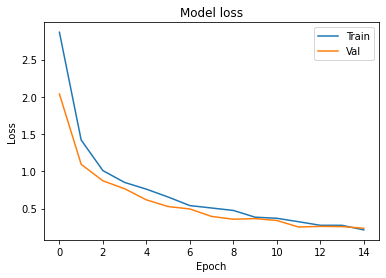

In [20]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

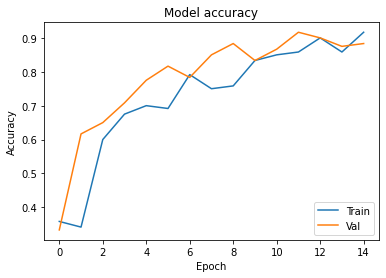

In [21]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()

In [56]:
# Confusion Matrix 

# Since we do not have a lot of data, we did not split into training-validation-testing.
# Instead we split into training-validation.
# we shall use images in validation dataset for testing. 

# There is one problem. Previously, we set shuffle = True in our generator.
# This makes it difficult to obtain predictions and their corresponding ground truth labels.
# Thus, we shall call the generator again, but this time set shuffle = False.
train_path = "/content/drive/My Drive/Colab Notebooks/covid19_detection/train_data"
test_path = "/content/drive/My Drive/Colab Notebooks/covid19_detection/test_data"

img_height, img_width=224,224
val_generator = train_datagen.flow_from_directory(
    directory = train_path,
    classes = ['covid','healthy','nocovid'],
    target_size=(img_height, img_width),
    seed = 42,
    batch_size = 32, 
    shuffle = False,
    subset = 'validation'
)

# Obtain predictions
pred = model.predict_generator(val_generator) # Gives class probabilities
pred = np.round(pred) # Gives one-hot encoded classes
pred = np.argmax(pred, axis = 1) # Gives class labels

# Obtain actual labels
actual = val_generator.classes
    
# Now plot matrix
cm = confusion_matrix(actual, pred, labels = [0, 1, 2])

Found 20 images belonging to 3 classes.


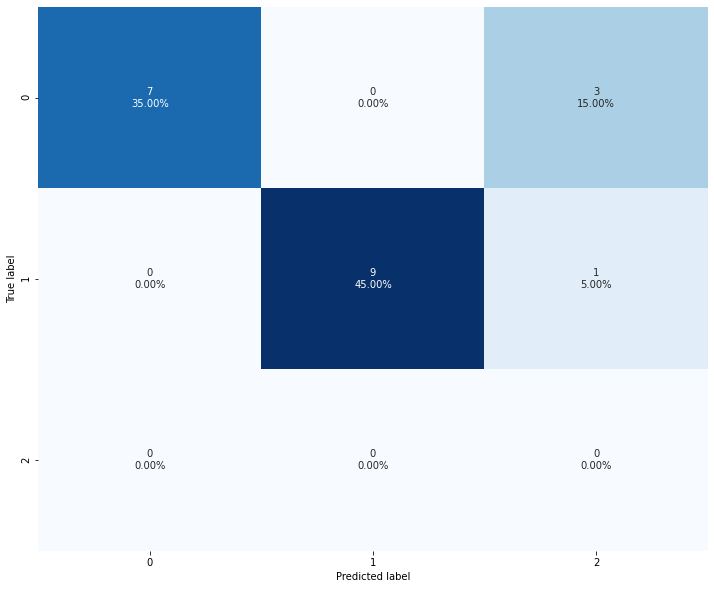

In [57]:
make_confusion_matrix(cm, figsize=(12,10), cbar=False)

In [58]:
# Classification Report
print(classification_report(actual, pred))

              precision    recall  f1-score   support

           0       1.00      0.70      0.82        10
           1       1.00      0.90      0.95        10
           2       0.00      0.00      0.00         0

    accuracy                           0.80        20
   macro avg       0.67      0.53      0.59        20
weighted avg       1.00      0.80      0.89        20



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [54]:
from keras.models import load_model
model.save('/content/drive/My Drive/Colab Notebooks/covid19_detection/train_data/vgg16modeltrained.h5')  # creates a HDF5 file 'vgg16modeltrained.h5'
# del model  # deletes the existing model

model = load_model('/content/drive/My Drive/Colab Notebooks/covid19_detection/train_data/vgg16modeltrained.h5')

In [55]:
model.summary()

Model: "functional_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
block1_conv1_input (InputLay [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)      